# PS18_15_Thyng_ADCP_combined

Run this from `~/adcpcode/data/adcp_processing/processed_data/ps1815`. All paths are relative to here.

Note that images have been stored in a github issue so that they can be referenced inline here without actually being stored in the repository.

There are two ADCP directories associated with this cruise that are merged here.

The first cruise (PS18_15_Thyng_ADCP_Cal) had a transducer phase offset (45).
For the second cruise (the rest of the data, PS18_15_Thyng_ADCP) that was mostly
fixed, i.e. a better angle was used (48.8).

In [39]:
import os
from IPython.display import display, Image
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

# define aliases for use within notebook
%alias dv python /Users/kthyng/opt/miniconda3/envs/pycodas/bin/dataviewer.py
%alias fv python /Users/kthyng/opt/miniconda3/envs/pycodas/bin/figview.py

In [2]:
# these are specific to this notebook
cruiseid = 'PS18_15_Thyng'
device = 'wh1200'

## Preprocessing

We need to preprocess because there are two directories of ADCP output with different transducer phase offsets.

### Merge ADCP data

Merge the 2 datasets into one dataset

In [3]:
datapath = '"/Volumes/GoogleDrive/Shared drives/NSF Rapid Response: Thyng & Socolofsky/HRRO2 November 5-8 2017/ADCP: Point Sur/PS18_15_Thyng_ADCP"'
datapathcal = '"/Volumes/GoogleDrive/Shared drives/NSF Rapid Response: Thyng & Socolofsky/HRRO2 November 5-8 2017/ADCP: Point Sur/PS18_15_Thyng_ADCP_Cal"'
# cruisepath = '/Users/kthyng/projects/adcp_processing/processed_data/' + cruiseid
datapathmerged = '/Users/kthyng/projects/adcp_processing/processed_data/' + cruiseid + '/PS18_15_Thyng_ADCP_merged/'

datapathorig = datapath + '/proc/' + device


In [4]:
!mkdir $datapathmerged

!link_uhdaslegs.py $datapathcal  $datapathmerged
!link_uhdaslegs.py $datapath     $datapathmerged


making directory /Users/kthyng/projects/adcp_processing/processed_data/PS18_15_Thyng/PS18_15_Thyng_ADCP_merged/raw
making directory /Users/kthyng/projects/adcp_processing/processed_data/PS18_15_Thyng/PS18_15_Thyng_ADCP_merged/rbin
------ raw -----

making directory /Users/kthyng/projects/adcp_processing/processed_data/PS18_15_Thyng/PS18_15_Thyng_ADCP_merged/raw/adu800
linking  /Volumes/GoogleDrive/Shared drives/NSF Rapid Response: Thyng & Socolofsky/HRRO2 November 5-8 2017/ADCP: Point Sur/PS18_15_Thyng_ADCP_Cal/raw/adu800/* to /Users/kthyng/projects/adcp_processing/processed_data/PS18_15_Thyng/PS18_15_Thyng_ADCP_merged/raw/adu800/*

making directory /Users/kthyng/projects/adcp_processing/processed_data/PS18_15_Thyng/PS18_15_Thyng_ADCP_merged/raw/gpsnav
linking  /Volumes/GoogleDrive/Shared drives/NSF Rapid Response: Thyng & Socolofsky/HRRO2 November 5-8 2017/ADCP: Point Sur/PS18_15_Thyng_ADCP_Cal/raw/gpsnav/* to /Users/kthyng/projects/adcp_processing/processed_data/PS18_15_Thyng/PS18_15

In [5]:
# for accessing post-processing of data
procpath = '/Users/kthyng/projects/adcp_processing/processed_data/' + cruiseid + '/postproc/' + device

# root of post-processing directory
procpathroot = '/Users/kthyng/projects/adcp_processing/processed_data/' + cruiseid + '/postproc/'

### Setup



In [6]:
!mkdir $procpathroot
!mkdir $procpath

configpathorig = datapath + '/proc/' + device + '/config/'
configfile = configpathorig + 'PS18_15_Thyng_proc.py'
configpath = 'config'

%cd $procpath
!mkdir config
!cp $configfile $configpath
%cd $procpathroot

/Users/kthyng/projects/adcp_processing/processed_data/PS18_15_Thyng/postproc/wh1200
/Users/kthyng/projects/adcp_processing/processed_data/PS18_15_Thyng/postproc


Change line in file PS18_15_Thyng_proc.py with `sed`:

In [7]:
str1 = 's,/home/data/PS18_15_Thyng,/Users/kthyng/projects/adcp_processing/processed_data/PS18_15_Thyng/PS18_15_Thyng_ADCP_merged/,g'
str2 = '/Users/kthyng/projects/adcp_processing/processed_data/PS18_15_Thyng/postproc/wh1200/config/PS18_15_Thyng_proc.py'

# change cruise location
!sed -i "" -e $str1 $str2


Run adcptree

In [8]:
pwd

'/Users/kthyng/projects/adcp_processing/processed_data/PS18_15_Thyng/postproc'

In [9]:
!adcptree.py  $device --datatype uhdas --cruisename $cruiseid

found adcp templates at  /Users/kthyng/opt/miniconda3/envs/pycodas/lib/python3.7/site-packages/pycurrents-0.0.0-py3.7-macosx-10.9-x86_64.egg/pycurrents/adcp/templates
otherdemo is /Users/kthyng/opt/miniconda3/envs/pycodas/lib/python3.7/site-packages/pycurrents-0.0.0-py3.7-macosx-10.9-x86_64.egg/pycurrents/adcp/templates/uhdas_template


** data type is uhdas
- copying additional files for data type uhdas

Traceback (most recent call last):
  File "/Users/kthyng/opt/miniconda3/envs/pycodas/bin/adcptree.py", line 4, in <module>
    __import__('pkg_resources').run_script('pycurrents==0.0.0', 'adcptree.py')
  File "/Users/kthyng/opt/miniconda3/envs/pycodas/lib/python3.7/site-packages/pkg_resources/__init__.py", line 665, in run_script
    self.require(requires)[0].run_script(script_name, ns)
  File "/Users/kthyng/opt/miniconda3/envs/pycodas/lib/python3.7/site-packages/pkg_resources/__init__.py", line 1463, in run_script
    exec(code, namespace, namespace)
  File "/Users/kthyng/opt/minicon

In [10]:
# This is to catch the output from the following cell command
logfile = os.path.join(procpath, device + '.txt')  # make logfile in new processing directory

In [11]:
# get helpful instructions, capture them into "filename", and move "filename" into the data_postproc directory
!quick_adcp.py --commands postproc > $logfile

In [12]:
# prepend the log file with the cruise info
temppath = os.path.join(datapathorig, 'cruise_info.txt') # path to cruise_info file
!cat $temppath $logfile  > tempfile.txt  # prepend cruise_info then logfile into new file
!mv tempfile.txt $logfile                # move new file into old logfile

In [13]:
# also save copy of cruise_info.txt here for reference
!cat $temppath 

LAST CHANGED    : 2017/11/09 01:00:46
CRUISE NAME(S)  : PS18_15_Thyng
CRUISE DATES    : 2017/11/06 17:16:05 to 2017/11/06 17:18:16
SHIP NAME       : unspecified
PORTS           : unspecified
CHIEF SCIENTIST : unspecified
DATABASE NAME   : a_ps
DATA FILES      : ps2017_309_62164.raw to ps2017_312_00000.raw

STATUS          :  to do                           done
                  ------                       -----------
                  averaged                       [     ]
                  loaded                         [     ]

                  NOTE: heading correction instrument exists
                        NOTE: time-dependent heading corrections
                        applied IN the ensembles
                        (see   cal/rotate/ens_hcorr.ang)

                  check heading correction       [     ]
                  calibration                    [     ]
                  edited                         [     ]
                  re-check heading correction    [     ]
 

In [14]:
str1 = 's/km1001c/' + cruiseid + '/g'
str2 = 's/os38nb/' + device + '/g'

In [15]:
# This might only work on Mac/Linux
# change default cruise name in file to this cruise name
!sed -i "" -e $str1 $logfile
# change default instrument name in file to this instrument
!sed -i "" -e $str2 $logfile

In [16]:
# The instructions are located in:
print(logfile)

/Users/kthyng/projects/adcp_processing/processed_data/PS18_15_Thyng/postproc/wh1200/wh1200.txt


### Process from scratch

After merging datasets, run processing here.

In [17]:
%cd $procpath

/Users/kthyng/projects/adcp_processing/processed_data/PS18_15_Thyng/postproc/wh1200


The following originated here: https://currents.soest.hawaii.edu/docs/adcp_doc/txtfiles/q_py_enr_heredoc.txt

In [18]:
%%bash
cat << EOF > q_py.cnt

### q_py.cnt contents

## all lines after the first "#" sign are ignored
 --yearbase    2017
 --cruisename  PS18_15_Thyng   # used to identify configuration files
                         #  *must* match prefix of files in config dir

 --update_gbin   ## NOTE: You should generally remake gbins
                 ## - you are not sure
                 ## - if parameters for averaging changed
                 ## - various other reasons.

                 ## ==> MAKE SURE you move the original gbin directory
                 ##     to another name first!!  Default directory
                 ##     to make gbins is in uhdas_dir


                 ## or... alternatively, use this parameter
 #--py_gbindirbase gbin # (will put them adjacent to q_py.cnt)

 --configtype python  ## use km1001c_proc.py for configuration

 --sonar       wh1200
 --dbname      a_ps
 --datatype    uhdas
 --ens_len     300

 --ping_headcorr        ## applies heading correction.
                        ## this ONLY works if there is a heading
                        ##     correction device specified in the
                        ##     config/km1001c_proc.py file

 --max_search_depth 3000  #if the topography says the ocean is deeper
                          # than this, do not autodetect the bottom.
                          # (reduces likelihood of shallow scattering
                          # layers being identified as the bottom)

            
EOF

In [19]:
pwd

'/Users/kthyng/projects/adcp_processing/processed_data/PS18_15_Thyng/postproc/wh1200'

In [20]:
!quick_adcp.py --cntfile q_py.cnt --auto

initializing cachefile dbinfo.txt
no dbinfo.txt: initializing
fix file is a_ps.gps
reflayer: ref_method = refsm
reflayer: refuv_source = nav
reflayer: refuv_smoothwin = 3
command line was: /Users/kthyng/opt/miniconda3/envs/pycodas/bin/quick_adcp.py --cntfile q_py.cnt --auto
cwd is /Users/kthyng/projects/adcp_processing/processed_data/PS18_15_Thyng/postproc/wh1200
about to run these steps:
 - write_clearflags
 - update_gbin
 - scandata
 - avg_and_load
 - codaseditsetup
 - setflags
 - getnav
 - lst_hdg
 - plot_headcorr
 - navsteps
 - lst_temp
 - plot_temp
 - lst_npings
 - calib
 - matfiles
 - adcpsect
 - refabs
 - smoothnav
 - putnav
 - refplots
 - codaseditsetup
found 34 files using wildcard expansion relative to scan directory
wildcard string was:   "/Users/kthyng/projects/adcp_processing/processed_data/PS18_15_Thyng/PS18_15_Thyng_ADCP_merged/raw/wh1200/*.raw"
presently in scan, writing filelist to /Users/kthyng/projects/adcp_processing/processed_data/PS18_15_Thyng/postproc/wh1200/ping

## Checks

### cruise track

Here is what the cruise track looks like:

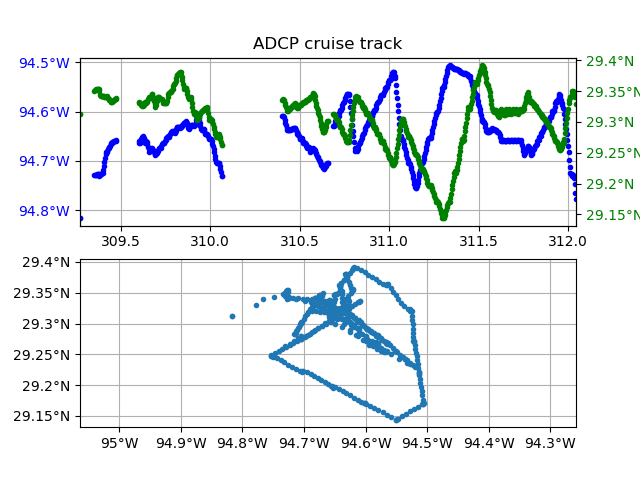

In [21]:
display(Image(os.path.join(procpath, 'nav', 'nav_plot.png'), width=600))

### heading

Look at figures in `~/cal/rotate/ens_hcorr_*.png` for gaps or red markers indicating problems.

This can be done with the following in the terminal window or here to browse the images, but they are also included below.

The images indicate that things are NOT looking good.

In [22]:
path = os.path.join(procpath, 'cal', 'rotate', 'ens_hcorr_*.png')

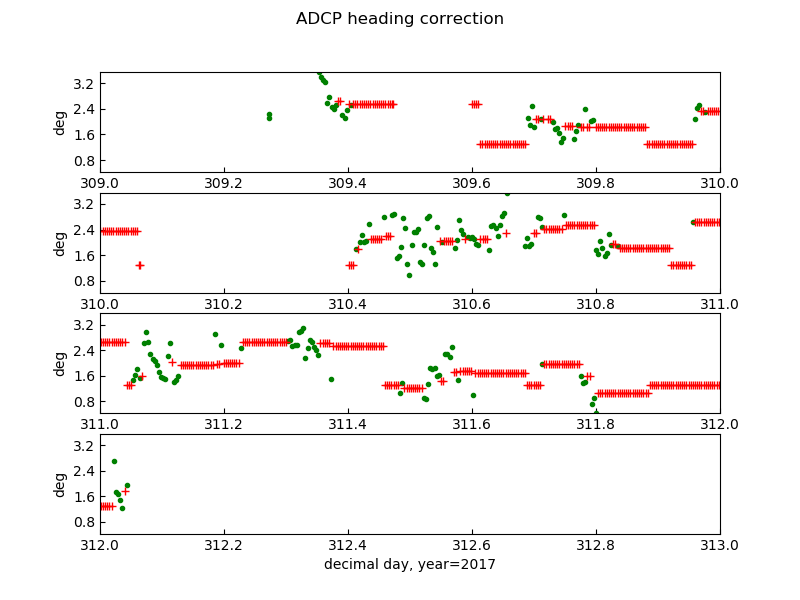

In [23]:
names = glob(path)
[display(Image(name, width=600)) for name in names];

## Unrotate

We will unrotate the data so that it does not use the gyro (hcorr).

Heading issue on Point Sur
There appears to be an on-going issue with ADCP data taken on the Point Sur with their heading data. A work-around follows.

A. undo automatic heading correction that was already applied by the system
B. use bottom tracking to fill in for bad heading correction

undo automatic heading correction that was already applied by the system that was based on hcorr
These are the steps taken below:

1. make a copy of directory for preservation
1. unrotate data
1. rerun calibration without bad heading correction applied

### Directory copy

In [24]:
# 1.
procpath_unrotated = os.path.join(procpathroot, device + '.unrotated')
!cp -r $procpath $procpath_unrotated

dbpath = os.path.join(procpath_unrotated, 'adcpdb', 'a_ps')


### Unrotate Data

In [25]:
# Giving database location relative to this notebook
text = ' DB_NAME:       ' + dbpath + '\n'
text +=''' LOG_FILE:      rotate.log
           TIME_RANGE:    all

           OPTION_LIST:
              water_and_bottom_track:
                year_base=          2017
                unrotate!
                amplitude=          1.0
                angle_0=            0.0
                end
              end
'''

# create helper file to unrotate data
f = open(os.path.join(procpath_unrotated, 'cal', 'rotate', 'unrotate.tmp'), 'w')
f.write(text)
f.close()

In [26]:
# 2.
path = os.path.join(procpath_unrotated, 'cal', 'rotate', 'unrotate.tmp')
!rotate $path  # unrotate


INFO: database /Users/kthyng/projects/adcp_processing/processed_data/PS18_15_Thyng/postproc/wh1200.unrotated/adcpdb/a_ps opened

--------
 Pass 1: Checking control file...
--------
INFO: DBMOVE search beyond end
% OPTIONS:
% =======
% water_and_bottom_track:% OPTIONS:
% =======
% year_base= 2017
% unrotate!
% amplitude= 1.000000
% angle_0= 0.000000
% =======

% =======

--------
 Pass 2: Updating database...
--------
% OPTIONS:
% =======
% water_and_bottom_track:% OPTIONS:
% =======
% year_base= 2017
% unrotate!
% amplitude= 1.000000
% angle_0= 0.000000
% =======

% =======

 Processing range:  2017/11/06 06:31:00 to 2017/11/09 01:02:00

 END OF DATABASE

INFO: database closed




### Rerun calibration

In [27]:
# 3.
%cd $procpath_unrotated
!quick_adcp.py --steps2rerun navsteps:calib --auto  # redo calibration without rotation
%cd -

/Users/kthyng/projects/adcp_processing/processed_data/PS18_15_Thyng/postproc/wh1200.unrotated
found dbinfo.txt: use values if otherwise unspecified
fix file is a_ps.gps
reflayer: ref_method = refsm
reflayer: refuv_source = nav
reflayer: refuv_smoothwin = 3
found steps2rerun: navsteps:calib
===========  new run: steps2rerun====================
command line was: /Users/kthyng/opt/miniconda3/envs/pycodas/bin/quick_adcp.py --steps2rerun navsteps:calib --auto
cwd is /Users/kthyng/projects/adcp_processing/processed_data/PS18_15_Thyng/postproc/wh1200.unrotated
about to run these steps:
 - navsteps
 - calib
 - adcpsect
 - refabs
 - smoothnav
 - putnav
 - refplots
 - codaseditsetup
database time range:
2017/11/06  06:31:53 to 2017/11/09  01:02:00
(309.272141 to 312.043056)
---------------------------------------------
step 1: set up files for codas editing (gautoedit.py)

---------------------------------------------
step 2: run all navsteps 


-------------------------
---- running navsteps --

### Check new calibration

#### Bottom track

In [28]:
# look at bottom track calibration for phase correction
print('Automatically rotated, original case:\n')
path = os.path.join(procpath, 'cal', 'botmtrk', 'btcaluv.out')
!tail -5 $path  

print('\n\nNew unrotated case:\n')
path = os.path.join(procpath_unrotated, 'cal', 'botmtrk', 'btcaluv.out')
!tail -5 $path

Automatically rotated, original case:

edited:   182 points, 2.0 min speed, 2.5 max dev
            median     mean      std
amplitude   0.9981   0.9980   0.0027
phase      -1.1607  -1.0365   0.5501



New unrotated case:

edited:   180 points, 2.0 min speed, 2.5 max dev
            median     mean      std
amplitude   0.9981   0.9980   0.0026
phase       1.1058   1.0492   0.4249



#### Water track

In [29]:
# look at water track calibration for comparison
print('Automatically rotated, original case:\n')
path = os.path.join(procpath, 'cal', 'watertrk', 'adcpcal.out')
!tail -20 $path  

print('\n\nNew unrotated case:\n')
path = os.path.join(procpath_unrotated, 'cal', 'watertrk', 'adcpcal.out')
!tail -20 $path

Automatically rotated, original case:

 ADCP watertrack calibration
##
 Time range 311.15 to 311.78
   Calculation done at Wed Jan 27 21:57:21 2021
   delta-u min = -100.00, max = 100.00
   delta-v min = -100.00, max = 100.00
   clip_amp = 0.04,  clip_ph =  3.0
   clip_dt =   60,  clip_var = 0.050
Number of edited points:   2 out of   4
   amp   = 0.9790  + 0.1307 (t - 311.2)
   phase =  -0.83  + 11.4706 (t - 311.2)
            median     mean      std
amplitude   0.9790   0.9790   0.0141
phase      -0.8305  -0.8305   1.2410
nav - pc   -5.5000  -5.5000  13.4350
var         0.0050   0.0050   0.0057
min var     0.0045   0.0045   0.0049
delta-u     2.0650   2.0650   0.3323
delta-v     0.1900   0.1900   1.6971



New unrotated case:

 ADCP watertrack calibration
##
 Time range 311.15 to 311.78
   Calculation done at Wed Jan 27 22:00:25 2021
   delta-u min = -100.00, max = 100.00
   delta-v min = -100.00, max = 100.00
   clip_amp = 0.04,  clip_ph =  3.0
   clip_dt =   60,  clip_var = 0.050


### new calibration pics

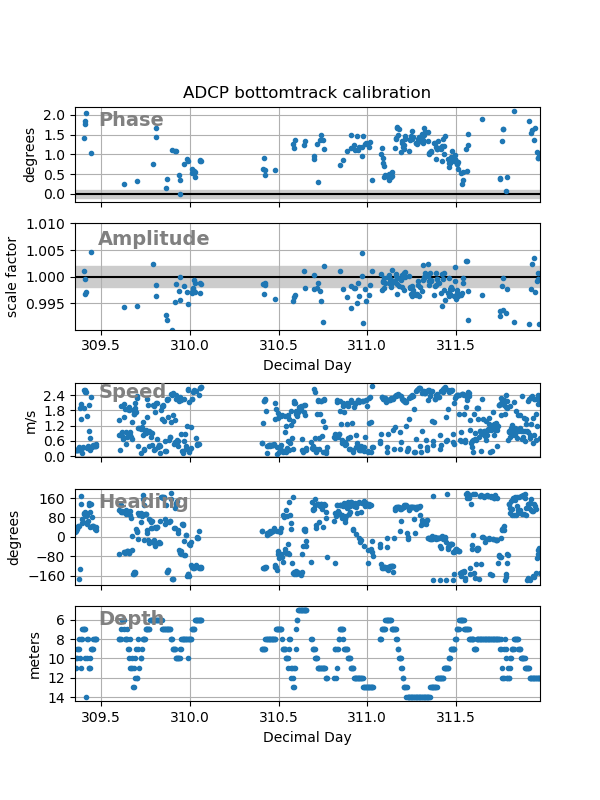

In [30]:
# Look at this phase correction
name = os.path.join(procpath_unrotated, 'cal', 'botmtrk', 'btcal.png')
display(Image(name, width=600));

## Fix heading



In [31]:
# path = os.path.join(procpath_unrotated, 'cal', 'botmtrk')

# %cd $path

In [32]:

# #!/usr/bin/env python

# ## written by quick_mplplots.py -- edit as needed:

# ## cruiseid      is 'ADCP'
# ## dbname        is 'a_ps'
# ## proc_yearbase is 2017
# ## printformats   is 'png'

# import matplotlib.pyplot as plt





# from pycurrents.adcp.quick_mpl import Btplot

# ## other parameters that can be chosen:
# ##   name            default
# ##   ------        --------------
# ##   dbname           (found in ../../adcpdb)
# ##   titlestr         (uses ADCP
# ##   proc_yearbase    (first year in database)
# ##   load_only                  False   # no output
# ##   printformats               'pdf'
# ##   dpi                        100
# ##   outfilebase               'btcal'
# ##   ddrange                    'all'
# ##   step                       1
# ##   min_speed                  2
# ##   max_sig                    2.5
# ##   max_gap                    0.1
# ##   tol_dt                     0.02
# ##   min_depth                  25                #shallower for high freq
# ##   max_depth                  1500
# ##

# BT = Btplot()
# BT(btm_filename='a_ps.btm',
#    ref_filename='a_ps.ref',
#    cruiseid = 'ADCP',
#    max_depth = 300,
#    printformats = 'png',
#    min_speed      =            0.2,
#    max_sig        =            2.5,
#    max_gap        =            0.1,
#    tol_dt         =            0.02,
#    min_depth      =            4,
#    proc_yearbase='2017')


Text(0.5, 1.0, 'bottom track phase vs gyro heading')

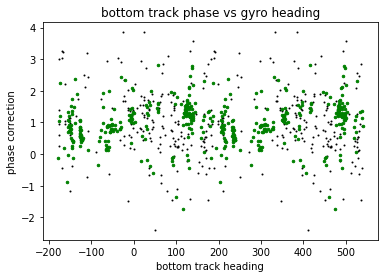

In [67]:
# from pycurrents.hints import *

# ph_=interp1(BT.dayuv, BT.ph_ma, BT.day_bt)

# islow=BT.speed_bt<1.5
# plt.plot(BT.heading_bt[islow],ph_[islow],'k.', ms=2)
# plt.plot(360+BT.heading_bt[islow],ph_[islow],'k.', ms=2)

# imed=(BT.speed_bt>=1.5) & (BT.speed_bt<=3)

# plt.plot(BT.heading_bt[imed],ph_[imed],'g.', ms=5)
# plt.plot(360+BT.heading_bt[imed],ph_[imed],'g.', ms=5)

# ifast=BT.speed_bt>=3
# plt.plot(BT.heading_bt[ifast],ph_[ifast],'r.', ms=7)
# plt.plot(360+BT.heading_bt[ifast],ph_[ifast],'r.', ms=7)

# ax=plt.gca()
# ax.set_xlabel('bottom track heading')
# ax.set_ylabel('phase correction')
# ax.set_title('bottom track phase vs gyro heading')


In [ ]:
# TRY HERE AND SEE HOW THEY WORK

In [179]:
# i_fastenough = BT.speed_bt>1.5
# a_=interp1(BT.dayuv, BT.a, BT.day_bt)

# BT.day_bt[i_fastenough], ph_[i_fastenough], a_[i_fastenough]

(array([309.317269, 309.320752, 309.324213, 309.327697, 309.331157,
        309.334641, 309.338102, 309.341586, 309.37978 , 309.383252,
        309.386725, 309.404086, 309.407558, 309.41103 , 309.414502,
        309.417975, 309.428391, 309.431863, 309.44228 , 309.480475,
        309.483947, 309.487419, 309.490891, 309.494363, 309.497836,
        309.501308, 309.50478 , 309.508252, 309.511725, 309.515197,
        309.518669, 309.522141, 309.525613, 309.553391, 309.556852,
        309.560336, 309.563796, 309.56728 , 309.570741, 309.574225,
        309.577685, 309.581169, 309.58463 , 309.588113, 309.591574,
        309.612419, 309.629769, 309.633252, 309.647141, 309.650602,
        309.654086, 309.657569, 309.678403, 309.681863, 309.685347,
        309.688808, 309.692292, 309.699236, 309.702697, 309.757697,
        309.761181, 309.764641, 309.792419, 309.795903, 309.806308,
        309.809792, 309.813252, 309.837558, 309.844502, 309.847975,
        309.851447, 309.868808, 309.87228 , 309.

In [173]:
# BT.speed_bt.shape, BT.day_bt.shape

((793,), (793,))

In [154]:
# %cd -

/Users/kthyng/projects/adcp_processing/processed_data/PS18_15_Thyng/postproc


2. use bottom tracking to fill in for bad heading correction
Calculate the relationship between heading and phase using fix_phase.use_model(). This uses a previously-calculated model that fits a sine wave to other PS18_09_Leg*_DiMarco cruise Point Sur data. This previous model was calculated in fix_phase.find_model() and was saved so that it can be used in other cases. This assumes that this relationship will be similar on different cruises. Output the calculated relationship to be applied to data.
try applying the phase corrections in positive and negative direction to see which is correct

In [156]:
# procpathroot

'/Users/kthyng/projects/adcp_processing/processed_data/PS18_15_Thyng/postproc/'

/Users/kthyng/projects/adcp_processing/ptsur_model
/Users/kthyng/projects/adcp_processing/processed_data/PS18_15_Thyng/postproc


/Users/kthyng/opt/miniconda3/envs/pycodas/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/kthyng/opt/miniconda3/envs/pycodas/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/kthyng/opt/miniconda3/envs/pycodas/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/kthyng/opt/miniconda3/envs/pycodas/lib/python3.7/site-packages/matplotlib/cbook/__i

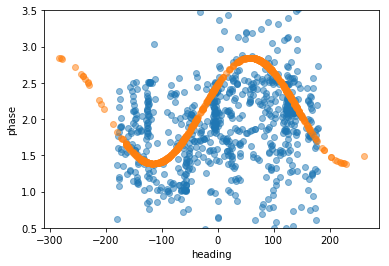

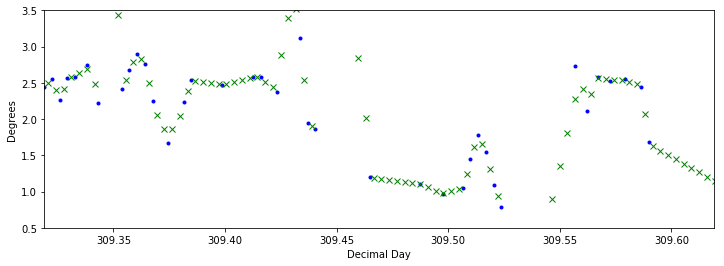

In [160]:
# pathmodel = os.path.join('..', '..','..', 'ptsur_model')
# %cd $pathmodel
# import fix_phase
# fix_phase.use_model(procpath_unrotated)
# %cd -

### Plot

In [33]:
pwd

'/Users/kthyng/projects/adcp_processing/processed_data/PS18_15_Thyng/postproc/wh1200'

In [34]:

#!/usr/bin/env python

## written by quick_mplplots.py -- edit as needed:

## cruiseid      is 'ADCP'
## dbname        is 'a_ps'
## proc_yearbase is 2017
## printformats   is 'png'

import matplotlib.pyplot as plt





from pycurrents.adcp.quick_mpl import Btplot

## other parameters that can be chosen:
##   name            default
##   ------        --------------
##   dbname           (found in ../../adcpdb)
##   titlestr         (uses ADCP
##   proc_yearbase    (first year in database)
##   load_only                  False   # no output
##   printformats               'pdf'
##   dpi                        100
##   outfilebase               'btcal'
##   ddrange                    'all'
##   step                       1
##   min_speed                  2
##   max_sig                    2.5
##   max_gap                    0.1
##   tol_dt                     0.02
##   min_depth                  25                #shallower for high freq
##   max_depth                  1500
##

BT = Btplot()
BT(btm_filename=procpath_unrotated + '/cal/botmtrk/a_ps.btm',
   ref_filename=procpath_unrotated + '/cal/botmtrk/a_ps.ref',
   cruiseid = 'ADCP',
   max_depth = 300,
   printformats = 'png',
   min_speed      =            0.2,
   max_sig        =            2.5,
   max_gap        =            0.1,
   tol_dt         =            0.02,
   min_depth      =            1,
   proc_yearbase='2017')


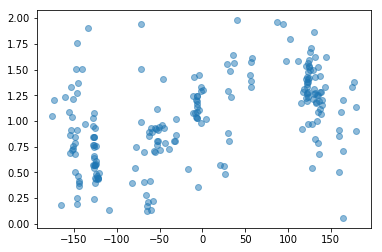

In [35]:
# modelfitname = 'model_fit.txt'
# fit = np.loadtxt('/Users/kthyng/projects/adcp_processing/ptsur_model/' + modelfitname)

scrit = 1.5

# ph_=interp1(BT.dayuv, BT.ph, BT.day_bt)
# a_=interp1(BT.dayuv, BT.a, BT.day_bt)
# ind_bt = BT.speed_bt>1.5
# i_fastenough = BT.speed_bt>1.5
# ind = BT.day_bt[i_fastenough]
# ph = ph_[i_fastenough]
# amp = a_[i_fastenough]

# create dataframe for amp/ph data
# uv = pd.DataFrame(index=ind, data={'phase': ph, 'amp': amp})
uv = pd.DataFrame(index=BT.dayuv, data={'phase': BT.ph, 'amp': BT.a})
# bottom track dataframe with own indices
# bt = pd.DataFrame(index=ind, data={'heading': BT.heading_bt[i_fastenough]})
bt = pd.DataFrame(index=BT.day_bt, data={'heading': BT.heading_bt, 'speed': BT.speed_bt})
scn = pd.read_table(procpath_unrotated + '/cal/rotate/scn.hdg', index_col=0,
                      delim_whitespace=True, header=None, comment='%',
                      names=['mean heading', 'last heading', 'correction'])
# hcorr = pd.read_table(leg + '/proc/wh300/cal/rotate/ens_hcorr.ang', index_col=0,
#                       delim_whitespace=True, header=None, names=['hcorr'])

# bt[bt.speed<scrit] = np.nan
# uv[uv.phase<1] = np.nan
# uv[uv.phase>3] = np.nan

# bt = bt[bt.speed>scrit]
# uv = uv[uv.phase>1] 
# uv = uv[uv.phase<3] 

# all indices included
dfall = scn.join(uv, how='outer').join(bt, how='outer').interpolate('index')
dfall = dfall.reindex(scn.index)  # just scn indices

# df[(df.speed>scrit)] = np.nan

# df[df.speed>scrit] = np.nan
# df = df.interpolate('values')
df = dfall[(dfall.speed>scrit) & (dfall.phase>0) & (dfall.phase<2)]
# df = dfall
df = df[~df.isnull().sum(axis=1).astype(bool)]  # with no nans

plt.plot(df.heading.values, df.phase.values, 'o', alpha=0.5)


In [37]:
def sine_fit(x, freq, amplitude, phase, offset):
    '''sine wave function.'''

    return np.sin(x * np.deg2rad(freq) + np.deg2rad(phase)) * amplitude + offset


/Users/kthyng/opt/miniconda3/envs/pycodas/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/kthyng/opt/miniconda3/envs/pycodas/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/kthyng/opt/miniconda3/envs/pycodas/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


array([1.07223861, 0.43266636, 9.34330006, 1.05751708])

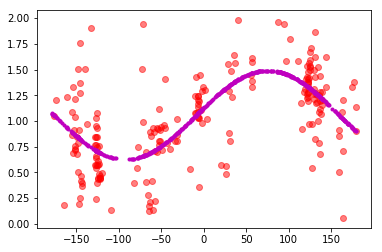

In [40]:

# fit = curve_fit(sine_fit, df['heading'].values, df['phase'].values)
# plt.plot(df['heading'], df['phase'], 'o', label='data', color='r', alpha=0.5)

# data_fit = sine_fit(dfall['heading'].values, *fit[0])
# plt.plot(dfall['heading'], data_fit, '.', label='fitting', color='m', lw=3)
# fit[0]

In [41]:
# dfall['new phase'] = sine_fit(dfall['heading'].values, *fit[0])
# # df['new phase'] = sine_fit(df['last heading'].values, *fit[0])

(0.0, 2.5)

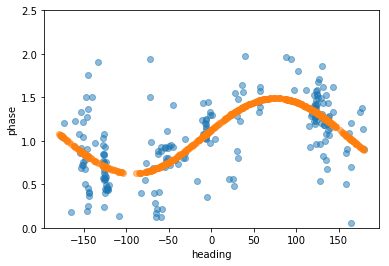

In [42]:
#     fig = plt.figure()
#     ax = fig.add_subplot(111)
#     ax.plot(df['heading'], df['phase'], 'o', alpha=0.5, label='data')
# #     ax.plot(df['last heading'], df['new phase'], 'o', alpha=0.5, label='model')
#     ax.plot(dfall['heading'], dfall['new phase'], 'o', alpha=0.5, label='model')
#     ax.set_xlabel('heading')
#     ax.set_ylabel('phase')
#     ax.set_ylim(0.0,2.5) 

/Users/kthyng/opt/miniconda3/envs/pycodas/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/kthyng/opt/miniconda3/envs/pycodas/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/kthyng/opt/miniconda3/envs/pycodas/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/kthyng/opt/miniconda3/envs/pycodas/lib/python3.7/site-packages/matplotlib/axes/_base.py:

Text(0, 0.5, 'Degrees')

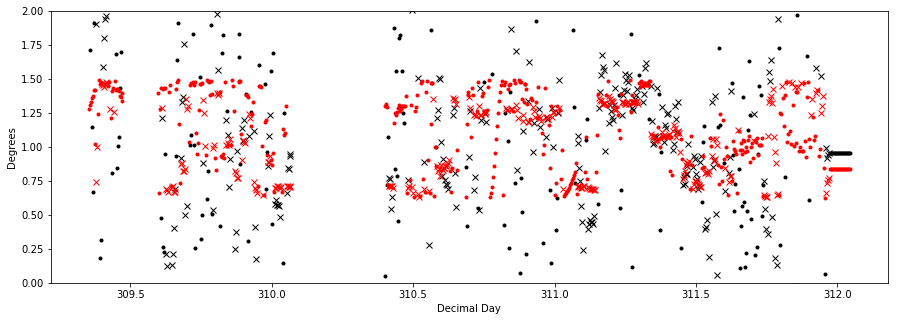

In [43]:
#     fig2 = plt.figure(figsize=(15,5))
#     ax2 = fig2.add_subplot(111)
#     ilow = dfall.speed<scrit
#     ihigh = dfall.speed>=scrit
#     ax2.plot(dfall.index[ilow], dfall.phase[ilow].values, 'k.')
#     ax2.plot(dfall.index[ihigh], dfall.phase[ihigh].values, 'kx')

#     ilow = dfall.speed<scrit
#     ihigh = dfall.speed>=scrit
#     ax2.plot(dfall.index[ilow], dfall['new phase'][ilow].values, 'r.')
#     ax2.plot(dfall.index[ihigh], dfall['new phase'][ihigh].values, 'rx')
# #     ax2.plot(dfall.index, dfall['new phase'].values, 'rx')
#     # ax2.axis('tight')
#     ax2.set_ylim(0,2.0)
#     ax2.set_xlabel('Decimal Day')
#     ax2.set_ylabel('Degrees')
#     # just show part of a day
# #     ax2.set_xlim(BT.dayuv.min(), BT.dayuv.min()+1)


### Fit

With interpolation to fill in first, and WH1200 fit

In [45]:
df2 = df.reindex(scn.index)
key = 'last heading'  # 'last heading'
df2[key] = df2[key].interpolate().interpolate(method='bfill')
df2['new phase'] = sine_fit(df2[key].values, *fit[0])


### Check

/Users/kthyng/opt/miniconda3/envs/pycodas/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


(0.0, 2.5)

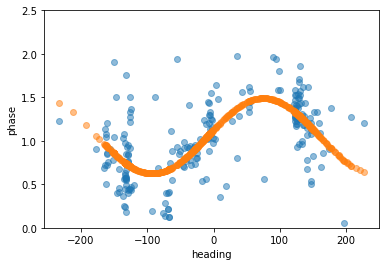

In [46]:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(df2[key], df2['phase'], 'o', alpha=0.5, label='data')
    ax.plot(df2[key], df2['new phase'], 'o', alpha=0.5, label='model')
    ax.set_xlabel('heading')
    ax.set_ylabel('phase')
    ax.set_ylim(0.0,2.5)

/Users/kthyng/opt/miniconda3/envs/pycodas/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/kthyng/opt/miniconda3/envs/pycodas/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0, 0.5, 'Degrees')

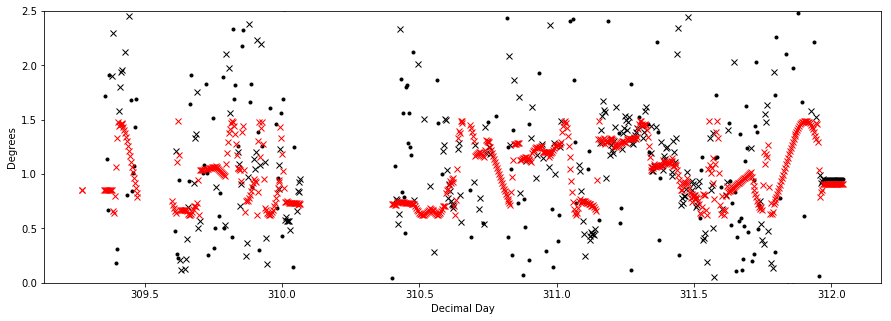

In [47]:
    fig2 = plt.figure(figsize=(15,5))
    ax2 = fig2.add_subplot(111)
    ilow = dfall.speed<scrit
    ihigh = dfall.speed>=scrit
    ax2.plot(dfall.index[ilow], dfall.phase[ilow].values, 'k.')
    ax2.plot(dfall.index[ihigh], dfall.phase[ihigh].values, 'kx')
#     ax2.plot(df.index, df.phase, 'ro')
    ax2.plot(df2.index, df2['new phase'].values, 'rx')
    # ax2.axis('tight')
    ax2.set_ylim(0,2.5)
    ax2.set_xlabel('Decimal Day')
    ax2.set_ylabel('Degrees')
    # just show part of a day
#     ax2.set_xlim(BT.dayuv.min(), BT.dayuv.min()+1)


### Save results

Save with correction applied both positive and negative to see which should be used.

In [48]:
fname = procpath_unrotated + '/cal/rotate/rotate_btphase_positive.ang'
df2['new phase'].to_csv(fname, sep=' ')
# negative angle
fname = procpath_unrotated + '/cal/rotate/rotate_btphase_negative.ang'
(-df2['new phase']).to_csv(fname, sep=' ')


In [49]:
pwd

'/Users/kthyng/projects/adcp_processing/processed_data/PS18_15_Thyng/postproc/wh1200'

## Apply heading correction

Try rotating positive first. It turns out this is the correct direction so I do not apply the negative direction rotation.

### Directory copy

In [50]:
# 1.
procpath_unrotated_newrotp = os.path.join(procpathroot, device + '.unrotated.newrotp')
!cp -r $procpath_unrotated $procpath_unrotated_newrotp

dbpath = os.path.join(procpath_unrotated_newrotp, 'adcpdb', 'a_ps')


### Rotate Data

with new correction values

In [59]:
# Giving database location relative to this notebook
text = ' DB_NAME:       ' + dbpath + '\n'
text +=''' LOG_FILE:      rotate.log
           TIME_RANGE:    all

           OPTION_LIST:
              water_and_bottom_track:
                year_base=          2017
                time_angle_file:  %s/cal/rotate/rotate_btphase_positive.ang
                amplitude=          1.0
                angle_0=            0.0
                end
              end
''' % procpath_unrotated_newrotp

# create helper file to unrotate data
f = open(os.path.join(procpath_unrotated_newrotp, 'cal', 'rotate', 'rotate.tmp'), 'w')
f.write(text)
f.close()

In [60]:
# 2.
path = os.path.join(procpath_unrotated_newrotp, 'cal', 'rotate', 'rotate.tmp')
!rotate $path  # rotate


INFO: database /Users/kthyng/projects/adcp_processing/processed_data/PS18_15_Thyng/postproc/wh1200.unrotated.newrotp/adcpdb/a_ps opened

--------
 Pass 1: Checking control file...
--------
INFO: DBMOVE search beyond end
% OPTIONS:
% =======
% water_and_bottom_track:% OPTIONS:
% =======
% year_base= 2017
% time_angle_file:                                                                                                                                                                                                                                                                                                                                                                                   /Users/kthyng/projects/adcp_processing/processed_data/PS18_15_Thyng/postproc/wh1200.unrotated.newrotp/cal/rotate/rotate_btphase_positive.ang
% amplitude= 1.000000
% angle_0= 0.000000
% =======

% =======
INFO: DBMOVE search beyond end

--------
 Pass 2: Updating database...
--------
% OPTIONS:
% =======
%

### Rerun calibration

In [61]:
# 3.
%cd $procpath_unrotated_newrotp
!quick_adcp.py --steps2rerun navsteps:calib --auto  # redo calibration without rotation
%cd -

/Users/kthyng/projects/adcp_processing/processed_data/PS18_15_Thyng/postproc/wh1200.unrotated.newrotp
found dbinfo.txt: use values if otherwise unspecified
fix file is a_ps.gps
reflayer: ref_method = refsm
reflayer: refuv_source = nav
reflayer: refuv_smoothwin = 3
found steps2rerun: navsteps:calib
===========  new run: steps2rerun====================
command line was: /Users/kthyng/opt/miniconda3/envs/pycodas/bin/quick_adcp.py --steps2rerun navsteps:calib --auto
cwd is /Users/kthyng/projects/adcp_processing/processed_data/PS18_15_Thyng/postproc/wh1200.unrotated.newrotp
about to run these steps:
 - navsteps
 - calib
 - adcpsect
 - refabs
 - smoothnav
 - putnav
 - refplots
 - codaseditsetup
database time range:
2017/11/06  06:31:53 to 2017/11/09  01:02:00
(309.272141 to 312.043056)
---------------------------------------------
step 1: set up files for codas editing (gautoedit.py)

---------------------------------------------
step 2: run all navsteps 


-------------------------
---- run

### Check new calibration

#### Bottom track

Best for checking phase. Looks good!

In [62]:
# look at bottom track calibration for phase correction
print('Automatically rotated, original case:\n')
path = os.path.join(procpath_unrotated, 'cal', 'botmtrk', 'btcaluv.out')
!tail -5 $path  

print('\n\nNew unrotated case:\n')
path = os.path.join(procpath_unrotated_newrotp, 'cal', 'botmtrk', 'btcaluv.out')
!tail -5 $path

Automatically rotated, original case:

edited:   180 points, 2.0 min speed, 2.5 max dev
            median     mean      std
amplitude   0.9981   0.9980   0.0026
phase       1.1058   1.0492   0.4249



New unrotated case:

edited:   175 points, 2.0 min speed, 2.5 max dev
            median     mean      std
amplitude   0.9982   0.9980   0.0026
phase       0.0000  -0.0074   0.2408



#### Water track

Best for checking amplitude. Could use small correction.

In [63]:
# look at water track calibration for comparison
print('Automatically rotated, original case:\n')
path = os.path.join(procpath_unrotated, 'cal', 'watertrk', 'adcpcal.out')
!tail -20 $path  

print('\n\nNew unrotated case:\n')
path = os.path.join(procpath_unrotated_newrotp, 'cal', 'watertrk', 'adcpcal.out')
!tail -20 $path

Automatically rotated, original case:

 ADCP watertrack calibration
##
 Time range 311.15 to 311.78
   Calculation done at Wed Jan 27 22:00:25 2021
   delta-u min = -100.00, max = 100.00
   delta-v min = -100.00, max = 100.00
   clip_amp = 0.04,  clip_ph =  3.0
   clip_dt =   60,  clip_var = 0.050
Number of edited points:   3 out of   5
   amp   = 0.9857  + 0.1495 (t - 311.3)
   phase =   1.43  + 9.5108 (t - 311.3)
            median     mean      std
amplitude   0.9910   0.9857   0.0147
phase       1.4880   1.4297   1.1666
nav - pc    1.0000   0.0000   6.5574
var         0.0030   0.0040   0.0036
min var     0.0030   0.0037   0.0031
delta-u     1.8300   1.1467   1.6079
delta-v     1.3900   0.9067   1.7265



New unrotated case:

 ADCP watertrack calibration
##
 Time range 311.15 to 311.78
   Calculation done at Wed Jan 27 22:09:44 2021
   delta-u min = -100.00, max = 100.00
   delta-v min = -100.00, max = 100.00
   clip_amp = 0.04,  clip_ph =  3.0
   clip_dt =   60,  clip_var = 0.050
N

### Apply amplitude correction

Apply small correction that is a combination of the amplitude median (0.9795) and mean (0.9795). We will use 0.9795.   

In [74]:
%cd $procpath_unrotated_newrotp
!quick_adcp.py --steps2rerun rotate:apply_edit:navsteps:calib --rotate_amplitude 0.9795 --auto
%cd -

/Users/kthyng/projects/adcp_processing/processed_data/PS18_15_Thyng/postproc/wh1200.unrotated.newrotp
found dbinfo.txt: use values if otherwise unspecified
fix file is a_ps.gps
reflayer: ref_method = refsm
reflayer: refuv_source = nav
reflayer: refuv_smoothwin = 3
found steps2rerun: rotate:apply_edit:navsteps:calib
===========  new run: steps2rerun====================
command line was: /Users/kthyng/opt/miniconda3/envs/pycodas/bin/quick_adcp.py --steps2rerun rotate:apply_edit:navsteps:calib --rotate_amplitude 0.9795 --auto
cwd is /Users/kthyng/projects/adcp_processing/processed_data/PS18_15_Thyng/postproc/wh1200.unrotated.newrotp
about to run these steps:
 - rotate
 - apply_edit
 - navsteps
 - calib
 - adcpsect
 - refabs
 - smoothnav
 - putnav
 - refplots
 - codaseditsetup
database time range:
2017/11/06  06:31:53 to 2017/11/09  01:02:00
(309.272141 to 312.043056)
---------------------------------------------
step 1: set up files for codas editing (gautoedit.py)

----------------------

### Check calibration now

The following show that the amplitude looks good!

In [75]:
path = os.path.join(procpath_unrotated_newrotp, 'cal', 'watertrk', 'adcpcal.out')
!tail -20  $path

 ADCP watertrack calibration
##
 Time range 311.15 to 311.78
   Calculation done at Wed Jan 27 22:12:15 2021
   delta-u min = -100.00, max = 100.00
   delta-v min = -100.00, max = 100.00
   clip_amp = 0.04,  clip_ph =  3.0
   clip_dt =   60,  clip_var = 0.050
Number of edited points:   2 out of   4
   amp   = 1.0000  + 0.1569 (t - 311.2)
   phase =   0.04  + 14.2353 (t - 311.2)
            median     mean      std
amplitude   1.0000   1.0000   0.0170
phase       0.0440   0.0440   1.5401
nav - pc    0.0000   0.0000  14.1421
var         0.0040   0.0040   0.0028
min var     0.0030   0.0030   0.0028
delta-u     2.0650   2.0650   0.3323
delta-v     0.1900   0.1900   1.6971



## Summary

This cruise is split into two folders. The first folder (`_Cal`) had a transducer phase offset.
For the second folder (the rest of the data), that was mostly fixed, i.e. a better angle was used.

Here are the general steps I followed:
* Combined the datasets
* Reprocessed the two segments from scratch
* Unrotated the data because the heading was bad
* Calculated and applied a time-dependent heading correction from the bottom track data
* Applied an amplitude correction of 0.9795.

## Extract data

End up with netCDF (wh1200.nc) and .mat (allbin_*.mat) files located in `~/contour/`.

In [77]:
procpath_unrotated_newrotp + '/contour'

'/Users/kthyng/projects/adcp_processing/processed_data/PS18_15_Thyng/postproc/wh1200.unrotated.newrotp/contour'

In [78]:
%cd $procpath_unrotated_newrotp
outpath = os.path.join('contour', device)
!adcp_nc.py adcpdb $outpath $cruiseid $device
!quick_adcp.py --steps2rerun matfiles --auto

/Users/kthyng/projects/adcp_processing/processed_data/PS18_15_Thyng/postproc/wh1200.unrotated.newrotp
found dbinfo.txt: use values if otherwise unspecified
fix file is a_ps.gps
reflayer: ref_method = refsm
reflayer: refuv_source = nav
reflayer: refuv_smoothwin = 3
found steps2rerun: matfiles
===========  new run: steps2rerun====================
command line was: /Users/kthyng/opt/miniconda3/envs/pycodas/bin/quick_adcp.py --steps2rerun matfiles --auto
cwd is /Users/kthyng/projects/adcp_processing/processed_data/PS18_15_Thyng/postproc/wh1200.unrotated.newrotp
about to run these steps:
 - matfiles
 - codaseditsetup
database time range:
2017/11/06  06:31:53 to 2017/11/09  01:02:00
(309.272141 to 312.043056)
---------------------------------------------
step 1: set up files for codas editing (gautoedit.py)

---------------------------------------------
step 2: extract matlab "allbins" 



In [79]:
# look at netCDF file contents
outpath = outpath + '.nc'
!ncdump -h $outpath
%cd -

netcdf wh1200 {
dimensions:
	time = 639 ;
	depth_cell = 40 ;
variables:
	int trajectory ;
		trajectory:standard_name = "trajectory_id" ;
	double time(time) ;
		time:long_name = "Decimal day" ;
		time:units = "days since 2017-01-01 00:00:00" ;
		time:C_format = "%12.5f" ;
		time:standard_name = "time" ;
		time:data_min = 309.272141203704 ;
		time:data_max = 312.043055555556 ;
	double lon(time) ;
		lon:missing_value = 1.e+38 ;
		lon:long_name = "Longitude" ;
		lon:units = "degrees_east" ;
		lon:C_format = "%9.4f" ;
		lon:standard_name = "longitude" ;
		lon:data_min = -94.8160222222222 ;
		lon:data_max = -94.5059916666667 ;
	double lat(time) ;
		lat:missing_value = 1.e+38 ;
		lat:long_name = "Latitude" ;
		lat:units = "degrees_north" ;
		lat:C_format = "%9.4f" ;
		lat:standard_name = "latitude" ;
		lat:data_min = 29.144125 ;
		lat:data_max = 29.3919555555556 ;
	float depth(time, depth_cell) ;
		depth:missing_value = 1.e+38f ;
		depth:long_name = "Depth" ;
		depth:units = "meter" ;
		depth

## Compare before and after post-processing

So, here is the difference between the cleaned up and the original data. The following is how to run this interactively. 

In [ ]:
dv -s 2.5 -m5 -n7 -c $procpath_unrotated_newrotp $procpath

qt.qpa.fonts: Populating font family aliases took 593 ms. Replace uses of missing font family "?" with one that exists to avoid this cost. 
Attribute Qt::AA_EnableHighDpiScaling must be set before QCoreApplication is created.
Attribute Qt::AA_EnableHighDpiScaling must be set before QCoreApplication is created.
qt.qpa.window: Window position QRect(0,-495 643x445) outside any known screen, using primary screen
Attribute Qt::AA_EnableHighDpiScaling must be set before QCoreApplication is created.
Attribute Qt::AA_EnableHighDpiScaling must be set before QCoreApplication is created.


Here is a snapshot of the results. 

Starting from the top subplot:
* u velocity, original
* u velocity, final
* difference: u (orig) - u (final)
* v velocity, original
* v velocity, final
* difference: v (orig) - v (final)